# CIFAR10 Classification Problem

## Imports

In [ ]:
from tensorflow.keras.datasets import cifar10
import numpy as np
import os
from google.colab import drive
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

### Step 2: Mount Google Drive

In [20]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Step 3: Navigate to the Challenge Directory

In [39]:
# os.chdir allows you to change directories, like cd in the Terminal
os.chdir('/content/drive/MyDrive/ColabNotebooks/data-cifar-classification')

### Step 4: Toggle GPU Acceleration

🚀 You are now ready to start, proceed with the challenge! 🚀

## (1) Loading the CIFAR10 Dataset

In [40]:
(images_train, labels_train), (images_test, labels_test) = cifar10.load_data()

labels = [
    'airplane',
    'automobile',
    'bird',
    'cat',
    'deer',
    'dog',
    'frog',
    'horse',
    'ship',
    'truck'
]
print(images_train.shape, images_test.shape)
unique, counts = np.unique(labels_train, return_counts=True)
dict(zip(unique, counts))

(50000, 32, 32, 3) (10000, 32, 32, 3)


{0: 5000,
 1: 5000,
 2: 5000,
 3: 5000,
 4: 5000,
 5: 5000,
 6: 5000,
 7: 5000,
 8: 5000,
 9: 5000}

### (1.1) Working on a smaller dataset?

In [41]:
# Considering only 1/10th of the 50_000 images
reduction_factor = 10

# Choosing the random indices of small train set and small test set
idx_train =  np.random.choice(len(images_train), round(len(images_train)/reduction_factor), replace=False)
idx_test =  np.random.choice(len(images_test), round(len(images_test)/reduction_factor), replace=False)

# Collecting the two subsamples images_train_small and images_test_small from images_train and images_test
images_train_small = images_train[idx_train]
images_test_small = images_test[idx_test]
# and their corresponding labels
labels_train_small = labels_train[idx_train]
labels_test_small = labels_test[idx_test]

print("------------------ Before -----------------")
print(images_train.shape, images_test.shape)

print("")

print("--- After applying the reduction factor ---")
print(images_train_small.shape, images_test_small.shape)

print("")
print("-"*43)

unique, counts = np.unique(labels_train_small, return_counts=True)
dict(zip(unique, counts))

------------------ Before -----------------
(50000, 32, 32, 3) (10000, 32, 32, 3)

--- After applying the reduction factor ---
(5000, 32, 32, 3) (1000, 32, 32, 3)

-------------------------------------------


{0: 499,
 1: 522,
 2: 506,
 3: 487,
 4: 525,
 5: 451,
 6: 501,
 7: 519,
 8: 487,
 9: 503}

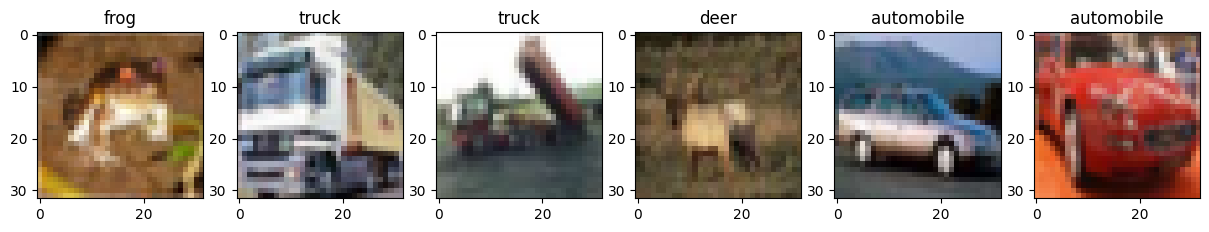

In [42]:
# Let's plot few images to see what they look like
plt.figure(figsize=(15,5))
for i in range(6):
    plt.subplot(1,6, i+1)
    img = images_train[i]
    label = labels_train[i][0]
    plt.imshow(img)
    plt.title(labels[label])

### (1.2) Image preprocesing

👉 As usual, let's:
- normalize the pixels' intensities between 0 and 1
- turn the `labels_train` and `labels_test` into "one-hot-encoded" targets that we will call respectively `y_train` and `y_test`

In [43]:
### Normalizing pixels' intensities
X_train = images_train / 255.
X_train_small = images_train_small / 255.
X_test = images_test / 255.
X_test_small = images_test_small / 255.

### Encoding the labels
y_train = to_categorical(labels_train, 10)
y_train_small = to_categorical(labels_train_small, 10)
y_test = to_categorical(labels_test, 10)
y_test_small = to_categorical(labels_test_small, 10)

## (2) Iterate on your CNN architecture using your small training set

In [44]:
def initialize_model():
    model = Sequential()
    # Convolutional layers
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    # Fully connected layers
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))  # Assuming 10 classes for classification

    return model

In [55]:
def compile_model(model):
    '''return a compiled model suited for the CIFAR-10 task'''
    model.compile(
        optimizer="adam",
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

In [56]:
model = initialize_model()
compile_model(model)
history = model.fit(
    X_train_small,
    y_train_small,
    epochs=10,
    batch_size=32,
    validation_split=0.2
    )

Epoch 1/10
125/125 [==============================] - 2s 6ms/step - loss: 2.1206 - accuracy: 0.2138 - val_loss: 1.9006 - val_accuracy: 0.3130
Epoch 2/10
125/125 [==============================] - 1s 4ms/step - loss: 1.8490 - accuracy: 0.3250 - val_loss: 1.7143 - val_accuracy: 0.4050
Epoch 3/10
125/125 [==============================] - 1s 5ms/step - loss: 1.6837 - accuracy: 0.3905 - val_loss: 1.5798 - val_accuracy: 0.4250
Epoch 4/10
125/125 [==============================] - 1s 5ms/step - loss: 1.5809 - accuracy: 0.4238 - val_loss: 1.4677 - val_accuracy: 0.4850
Epoch 5/10
125/125 [==============================] - 1s 5ms/step - loss: 1.4912 - accuracy: 0.4605 - val_loss: 1.4663 - val_accuracy: 0.4680
Epoch 6/10
125/125 [==============================] - 1s 5ms/step - loss: 1.4132 - accuracy: 0.4910 - val_loss: 1.4326 - val_accuracy: 0.4930
Epoch 7/10
125/125 [==============================] - 1s 5ms/step - loss: 1.3306 - accuracy: 0.5232 - val_loss: 1.4002 - val_accuracy: 0.4980
Epoch 

❓ **Question: History of your training** ❓

In [47]:
def plot_history(history, title='', axs=None, exp_name=""):
    if axs is not None:
        ax1, ax2 = axs
    else:
        f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    if len(exp_name) > 0 and exp_name[0] != '_':
        exp_name = '_' + exp_name
    ax1.plot(history.history['loss'], label = 'train' + exp_name)
    ax1.plot(history.history['val_loss'], label = 'val' + exp_name)
    ax1.set_ylim(0., 2.2)
    ax1.set_title('loss')
    ax1.legend()

    ax2.plot(history.history['accuracy'], label='train accuracy'  + exp_name)
    ax2.plot(history.history['val_accuracy'], label='val accuracy'  + exp_name)
    ax2.set_ylim(0.25, 1.)
    ax2.set_title('Accuracy')
    ax2.legend()
    return (ax1, ax2)

(<Axes: title={'center': 'loss'}>, <Axes: title={'center': 'Accuracy'}>)

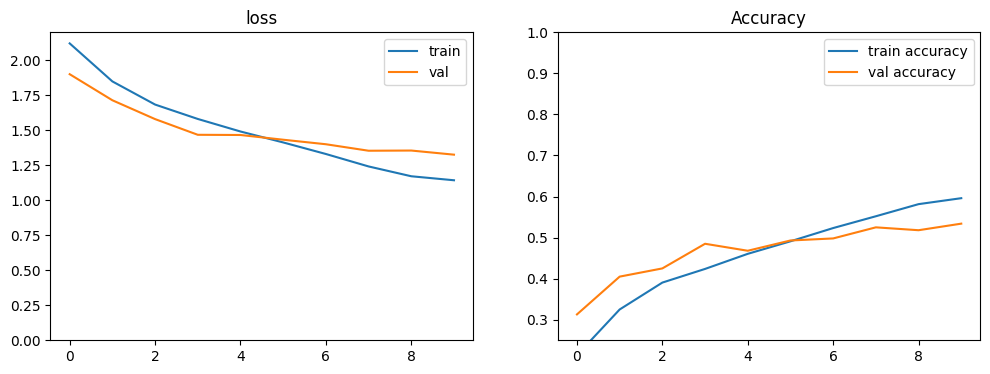

In [57]:
plot_history(history)

❓ **Question: Evaluating your CNN** ❓

* Evaluate your model on the test data and compare it with a baseline accuracy.
* Are you satisfied with this performance?
* Look at the `PRO TIPS` above and iterate a bit if you want to improve your performance!

In [58]:
model.evaluate(X_test_small, y_test_small)

32/32 [==============================] - 0s 3ms/step - loss: 1.3500 - accuracy: 0.5120


[1.3500325679779053, 0.5120000243186951]

## (3) Increase the size of your training data

In [59]:
datagen = ImageDataGenerator(
    featurewise_center = False,
    featurewise_std_normalization = False,
    rotation_range = 10,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    horizontal_flip = True,
    zoom_range = (0.8, 1.2),
    )
datagen.fit(X_train)
datagen

In [60]:
X_augmented_iterator = datagen.flow(X_train, shuffle=False, batch_size=1)
X_augmented_iterator

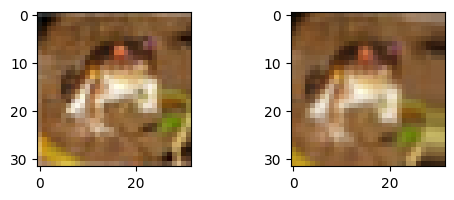

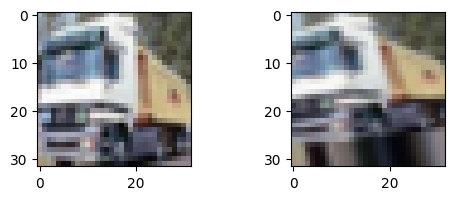

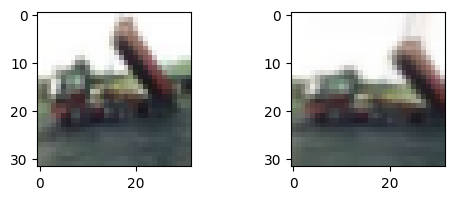

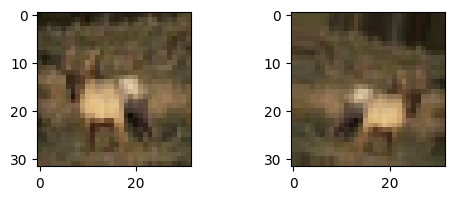

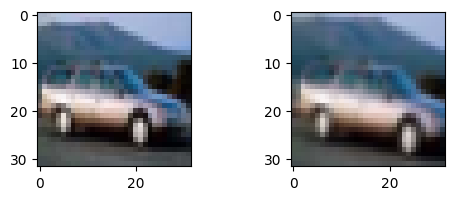

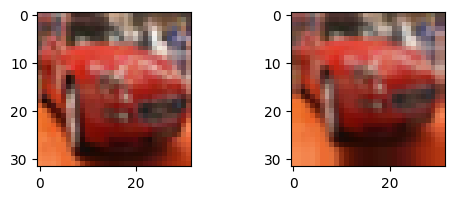

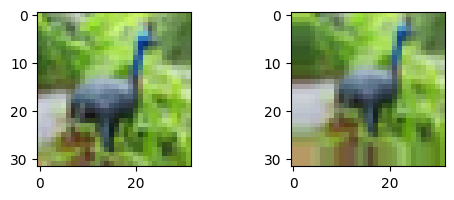

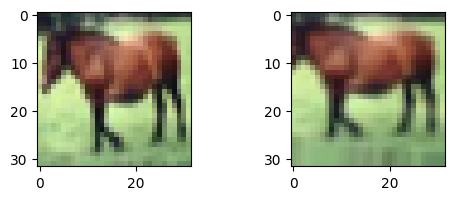

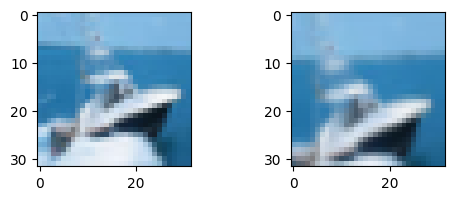

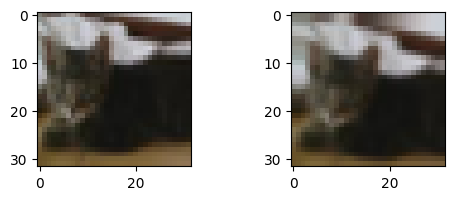

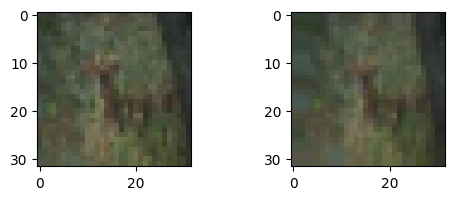

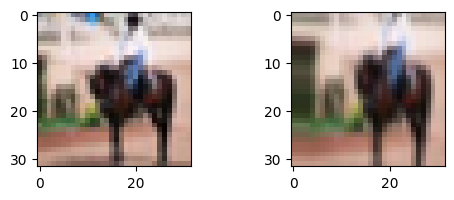

In [61]:
for i, (raw_image, augmented_image) in enumerate(zip(X_train, X_augmented_iterator)):
    _, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 2))
    ax1.imshow(raw_image)
    ax2.imshow(augmented_image[0])
    plt.show()

    if i > 10:
        break

In [37]:
model_aug = initialize_model()
model_aug = compile_model(model_aug)

In [62]:
# The model
model_aug = initialize_model()
model_aug = compile_model(model_aug)
# The data generator
X_tr = X_train[:40000]
y_tr = y_train[:40000]
X_val = X_train[40000:]
y_val = y_train[40000:]
train_flow = datagen.flow(X_tr, y_tr, batch_size = 64)
# The early stopping criterion
es = EarlyStopping(patience = 3)
# The fit
history_aug = model_aug.fit(
    train_flow,
    epochs = 50,
    callbacks = [es],
    validation_data = (X_val, y_val)
)

Epoch 1/50
625/625 [==============================] - 28s 41ms/step - loss: 1.8039 - accuracy: 0.3372 - val_loss: 1.5349 - val_accuracy: 0.4481
Epoch 2/50
625/625 [==============================] - 27s 44ms/step - loss: 1.5574 - accuracy: 0.4333 - val_loss: 1.4365 - val_accuracy: 0.4880
Epoch 3/50
625/625 [==============================] - 29s 46ms/step - loss: 1.4602 - accuracy: 0.4774 - val_loss: 1.3672 - val_accuracy: 0.5159
Epoch 4/50
625/625 [==============================] - 25s 40ms/step - loss: 1.3894 - accuracy: 0.5055 - val_loss: 1.1186 - val_accuracy: 0.6054
Epoch 5/50
625/625 [==============================] - 25s 40ms/step - loss: 1.3440 - accuracy: 0.5193 - val_loss: 1.1195 - val_accuracy: 0.6028
Epoch 6/50
625/625 [==============================] - 26s 41ms/step - loss: 1.3043 - accuracy: 0.5378 - val_loss: 1.0629 - val_accuracy: 0.6249
Epoch 7/50
625/625 [==============================] - 28s 44ms/step - loss: 1.2770 - accuracy: 0.5492 - val_loss: 1.0714 - val_accuracy:

(<Axes: title={'center': 'loss'}>, <Axes: title={'center': 'Accuracy'}>)

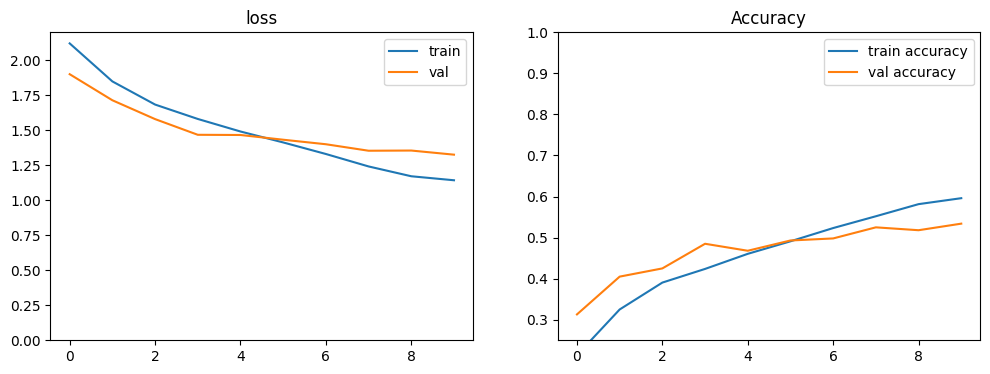

In [63]:
plot_history(history)

(<Axes: title={'center': 'loss'}>, <Axes: title={'center': 'Accuracy'}>)

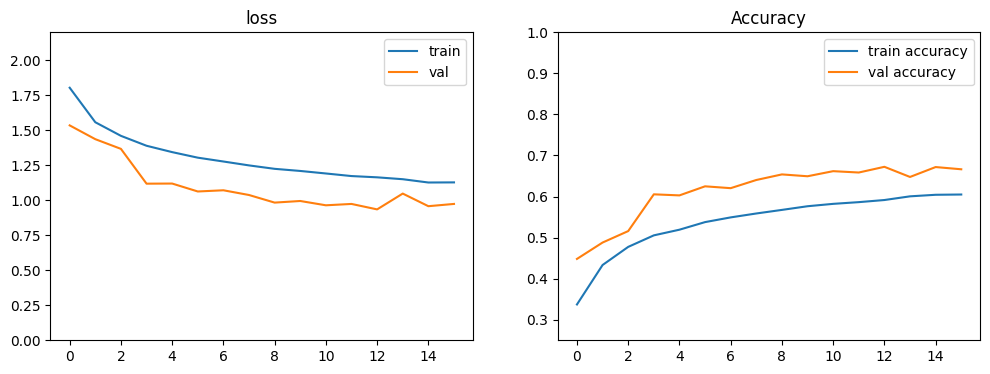

In [64]:
plot_history(history_aug)